<a href="https://colab.research.google.com/github/AndroKun/23423043_Andro-Lintang-Mahaegan_UTS-Pengolahan-Citra-Digital/blob/main/Jawaban_Nomor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== SOAL NO. 2: KONVOLUSI FILTER ===
Membuat gambar synthetic...
Gambar yang digunakan: Shape (256, 256)
Kernel yang digunakan:
LPF (Low Pass):
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
HPF (High Pass):
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
BPF (Band Pass):
[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]
Konvolusi berhasil!

=== STATISTIK NILAI PIKSEL ===
Original - Mean: 127.50
LPF      - Mean: 127.50
HPF      - Mean: 0.02
BPF      - Mean: 127.50


/tmp/ipython-input-4008938114.py:84: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.flatten(), 256, [0,256], alpha=0.7, label='Original', color='blue')
/tmp/ipython-input-4008938114.py:85: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_lpf.flatten(), 256, [0,256], alpha=0.7, label='LPF', color='green')
/tmp/ipython-input-4008938114.py:86: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_hpf.flatten(), 256, [0,256], alpha=0.7, label='HPF', color='red')
/tmp/ipython-input-4008938114.py:87: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotli

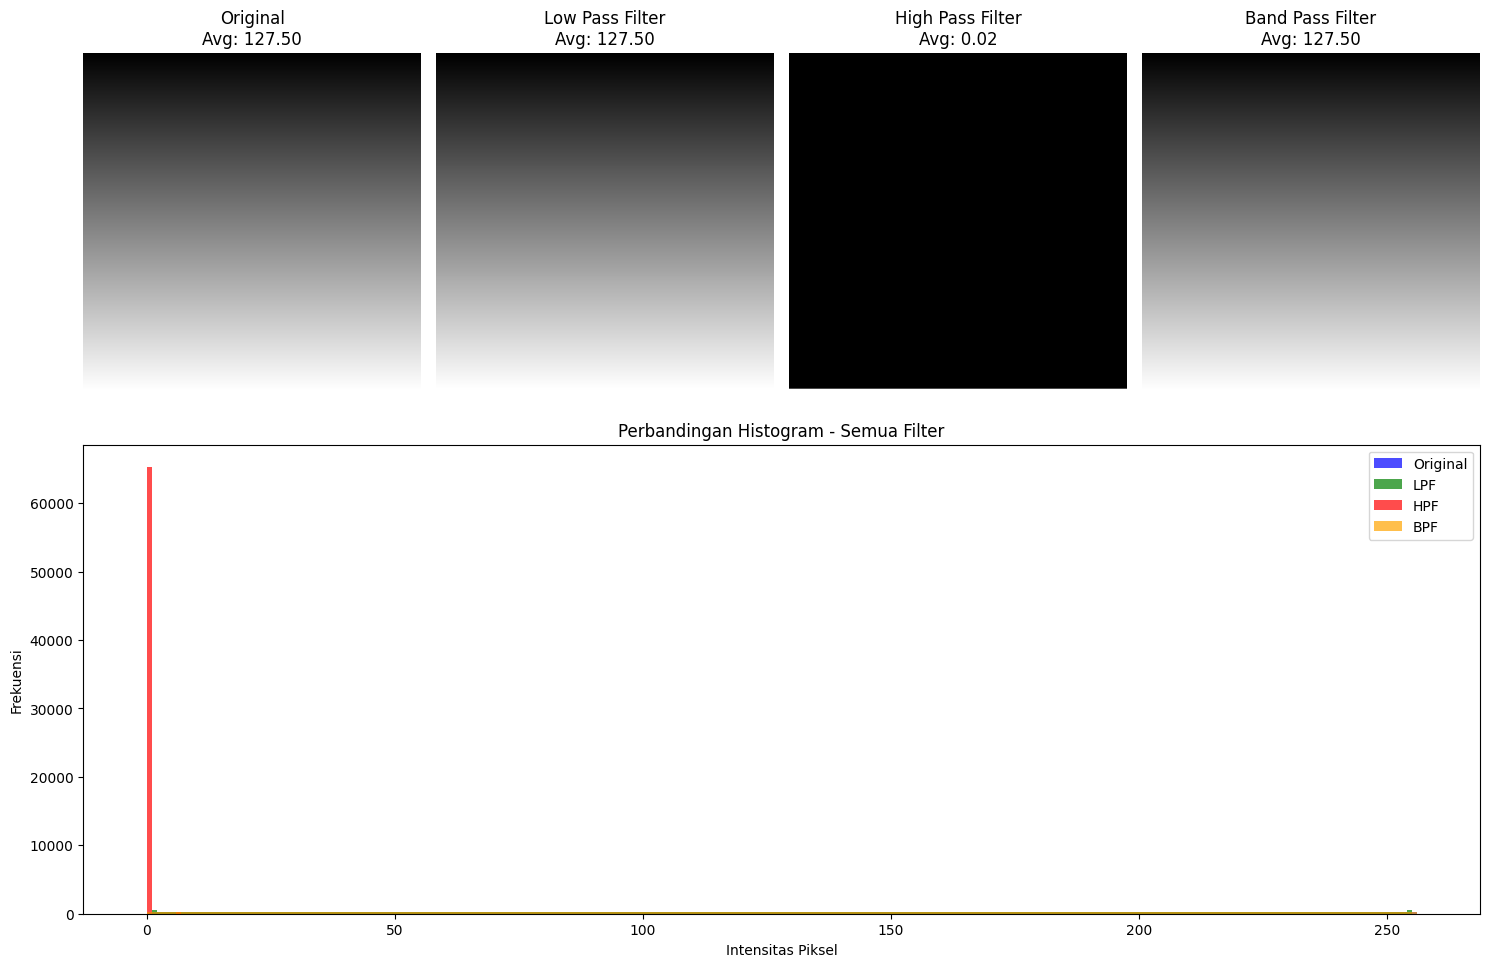


=== ANALISA HASIL ===
1. LPF (Low Pass Filter):
   - Gambar lebih blur dan halus
   - Noise berkurang, tepi tidak tajam
   - Nilai rata-rata mirip dengan original

2. HPF (High Pass Filter):
   - Hanya menampilkan tepi dan perubahan intensitas
   - Area homogen menjadi gelap (nilai ~0)
   - Nilai rata-rata lebih rendah

3. BPF (Band Pass Filter):
   - Kombinasi LPF dan HPF
   - Menajamkan gambar tanpa noise berlebihan
   - Nilai rata-rata antara LPF dan HPF


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("=== SOAL NO. 2: KONVOLUSI FILTER ===")

# Gunakan gambar yang sama dari Soal 1 (asumsi sudah ada)
# Jika img tidak ada, buat synthetic
try:
    if 'img' not in locals() or img is None:
        # Buat gambar synthetic sebagai fallback
        print("Membuat gambar synthetic...")
        img = np.random.randint(0, 256, (256, 256), dtype=np.uint8)
        # Tambahkan gradient untuk testing filter
        for i in range(256):
            img[i, :] = i
except:
    img = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

print(f"Gambar yang digunakan: Shape {img.shape}")

# Definisikan kernel
kernel_lpf = np.ones((3,3), np.float32) / 9
kernel_hpf = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]], np.float32)
kernel_bpf = np.array([[0,-1,0],
                       [-1,5,-1],
                       [0,-1,0]], np.float32)

print("Kernel yang digunakan:")
print(f"LPF (Low Pass):\n{kernel_lpf}")
print(f"HPF (High Pass):\n{kernel_hpf}")
print(f"BPF (Band Pass):\n{kernel_bpf}")

# Aplikasikan konvolusi
img_lpf = cv2.filter2D(img, -1, kernel_lpf)
img_hpf = cv2.filter2D(img, -1, kernel_hpf)
img_bpf = cv2.filter2D(img, -1, kernel_bpf)

print("Konvolusi berhasil!")

# Hitung nilai piksel rata-rata
avg_original = np.mean(img)
avg_lpf = np.mean(img_lpf)
avg_hpf = np.mean(img_hpf)
avg_bpf = np.mean(img_bpf)

print("\n=== STATISTIK NILAI PIKSEL ===")
print(f"Original - Mean: {avg_original:.2f}")
print(f"LPF      - Mean: {avg_lpf:.2f}")
print(f"HPF      - Mean: {avg_hpf:.2f}")
print(f"BPF      - Mean: {avg_bpf:.2f}")

# Tampilkan hasil dalam satu figure
plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 4, 1)
plt.imshow(img, cmap='gray')
plt.title(f'Original\nAvg: {avg_original:.2f}')
plt.axis('off')

# Low Pass Filter
plt.subplot(2, 4, 2)
plt.imshow(img_lpf, cmap='gray')
plt.title(f'Low Pass Filter\nAvg: {avg_lpf:.2f}')
plt.axis('off')

# High Pass Filter
plt.subplot(2, 4, 3)
plt.imshow(img_hpf, cmap='gray')
plt.title(f'High Pass Filter\nAvg: {avg_hpf:.2f}')
plt.axis('off')

# Band Pass Filter
plt.subplot(2, 4, 4)
plt.imshow(img_bpf, cmap='gray')
plt.title(f'Band Pass Filter\nAvg: {avg_bpf:.2f}')
plt.axis('off')

# Histogram perbandingan
plt.subplot(2, 1, 2)
plt.hist(img.flatten(), 256, [0,256], alpha=0.7, label='Original', color='blue')
plt.hist(img_lpf.flatten(), 256, [0,256], alpha=0.7, label='LPF', color='green')
plt.hist(img_hpf.flatten(), 256, [0,256], alpha=0.7, label='HPF', color='red')
plt.hist(img_bpf.flatten(), 256, [0,256], alpha=0.7, label='BPF', color='orange')
plt.legend()
plt.title('Perbandingan Histogram - Semua Filter')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

print("\n=== ANALISA HASIL ===")
print("1. LPF (Low Pass Filter):")
print("   - Gambar lebih blur dan halus")
print("   - Noise berkurang, tepi tidak tajam")
print("   - Nilai rata-rata mirip dengan original")

print("\n2. HPF (High Pass Filter):")
print("   - Hanya menampilkan tepi dan perubahan intensitas")
print("   - Area homogen menjadi gelap (nilai ~0)")
print("   - Nilai rata-rata lebih rendah")

print("\n3. BPF (Band Pass Filter):")
print("   - Kombinasi LPF dan HPF")
print("   - Menajamkan gambar tanpa noise berlebihan")
print("   - Nilai rata-rata antara LPF dan HPF")